Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Matplotlib is building the font cache; this may take a moment.


Data collection and processing

In [ ]:
#loading the dataset to pandas dataframe
loan_dataset = pd.read_csv('train_loan_status 1.csv')

In [6]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [7]:
# printing the first five rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [9]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#dropping the missing values
loan_dataset = loan_dataset.dropna()

In [12]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

/var/folders/t_/8vzjky9j45x6_ryf2jfz8gsc0000gn/T/ipykernel_67809/2341236847.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)


In [13]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [14]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [15]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [16]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

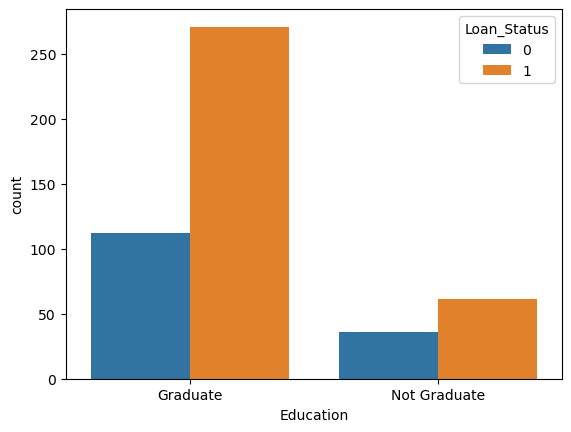

In [17]:
# education and loan status
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

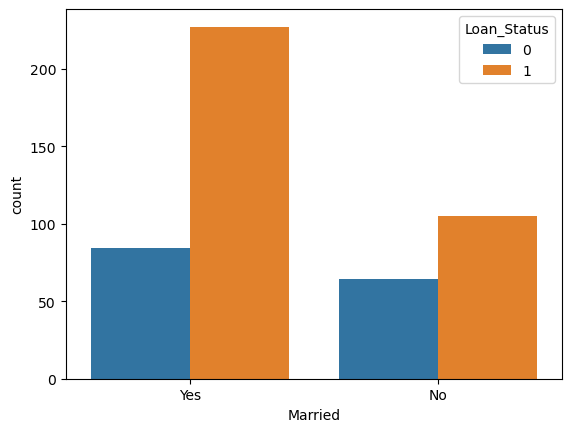

In [18]:
# married status and loan status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

In [19]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}, 'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

/var/folders/t_/8vzjky9j45x6_ryf2jfz8gsc0000gn/T/ipykernel_67809/786656519.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}, 'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)


In [20]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [21]:

loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'] / 10

loan_dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,36.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,36.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,36.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,36.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,36.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,36.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,18.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,36.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,36.0,1.0,2,1


In [22]:
# seperating the data and label
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']

Train Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:
Support Vector Machine Model

In [25]:
classifier = svm.SVC(kernel='linear')

In [26]:
#training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [27]:
import joblib
joblib.dump(classifier, 'classifier_model.pkl')

['classifier_model.pkl']

Model Evaluation

In [28]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [29]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7962962962962963


In [30]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [31]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8541666666666666


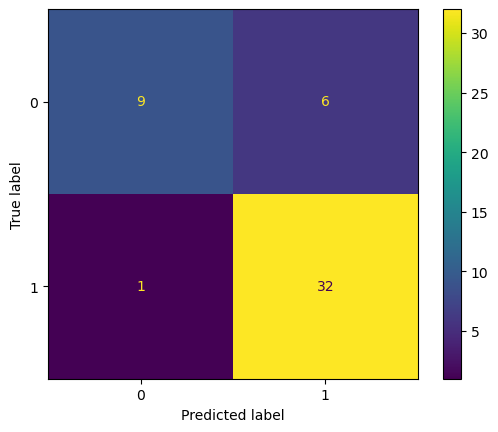

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting the labels for the test set
Y_test_predictions = classifier.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_predictions)

# Displaying the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier.classes_).plot()


In [33]:
import pandas as pd
import joblib 


test_data = pd.DataFrame({
    'Loan_ID': ['TEST001', 'TEST002', 'TEST003'],
    'Gender': [1, 0, 1],  # 1 = Male, 0 = Female
    'Married': [1, 0, 1],  # 1 = Yes, 0 = No
    'Dependents': [0, 1, 2],  # Number of dependents
    'Education': [1, 0, 1],  # 1 = Graduate, 0 = Not Graduate
    'Self_Employed': [0, 1, 0],  # 1 = Yes, 0 = No
    'ApplicantIncome': [50000, 3000, 7000],  # Applicant's income
    'CoapplicantIncome': [2000, 1000, 0],  # Co-applicant's income
    'LoanAmount': [1500, 120, 200],  # Loan amount
    'Loan_Amount_Term': [36, 360, 6],  # Loan term in months
    'Credit_History': [0.0, 1.0, 1.0],  # 1.0 = Good, 0.0 = Bad
    'Property_Area': [2, 1, 0]  # 0 = Rural, 1 = Semiurban, 2 = Urban
})

X_test_manual = test_data.drop(columns=['Loan_ID'])
classifier = joblib.load('classifier_model.pkl')

predictions = classifier.predict(X_test_manual)


test_data['Predicted_Status'] = ['Y' if pred == 1 else 'N' for pred in predictions]


print(test_data[['Loan_ID', 'Predicted_Status']])



   Loan_ID Predicted_Status
0  TEST001                N
1  TEST002                N
2  TEST003                Y
